# MSK MetTropism

See this [repo](https://www.cbioportal.org/study/summary?id=msk_met_2021) for data source and features distributions.
Feature are described in this [paper](https://www.cell.com/action/showPdf?pii=S0092-8674%2822%2900003-4).

> Overall, the median follow-up
time was 30 months, and the 5-year survival rate was 40%,
ranging from 90% to 10%. There was a median of four metastatic events
per patient

>  Overall survival (OS) was measured from the time of sequencing to death and was censored at the last time the patient
was known to be alive. If a patient had more than one sequenced sample, the first time of sequencing was used. Median followup time was calculated using the reverse Kaplan-Meier method. Median overall survival and five-year survival rate were calculated
by the Kaplan-Meier method. The association between metastatic burden and overall survival was assessed using univariable Cox
proportional hazards regression models

In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

data_path = Path("../data/msk/msk_met_2021_clinical_data.tsv")
df = pd.read_csv(data_path, sep="\t")
df

Study ID Patient ID          Sample ID  Age at Death  \
0      msk_met_2021  P-0000004  P-0000004-T01-IM3         40.06   
1      msk_met_2021  P-0000015  P-0000015-T01-IM3         45.60   
2      msk_met_2021  P-0000024  P-0000024-T01-IM3         64.25   
3      msk_met_2021  P-0000025  P-0000025-T02-IM5         76.53   
4      msk_met_2021  P-0000026  P-0000026-T01-IM3           NaN   
...             ...        ...                ...           ...   
25770  msk_met_2021  P-0050559  P-0050559-T01-IM6           NaN   
25771  msk_met_2021  P-0050565  P-0050565-T01-IM6           NaN   
25772  msk_met_2021  P-0050566  P-0050566-T01-IM6           NaN   
25773  msk_met_2021  P-0050567  P-0050567-T01-IM6           NaN   
25774  msk_met_2021  P-0050568  P-0050568-T01-IM6           NaN   

       Age at First Mets Dx  Age at Last Contact  Age at Sequencing  \
0                     39.66                  NaN              39.74   
1                     44.25                  NaN              44.44   
2                     59.44                  NaN              61.33   
3                     69.65                  NaN              74.81   
4                     68.41                78.43              71.72   
...                     ...                  ...                ...   
25770                   NaN                58.12              57.23   
25771                 70.00                71.03              70.14   
25772                 80.84                81.76              80.88   
25773                   NaN                44.11              43.23   
25774                   NaN                76.83              76.83   

       Age at Surgical Procedure                 Cancer Type  \
0                          37.03               Breast Cancer   
1                          44.42               Breast Cancer   
2                          61.00          Endometrial Cancer   
3                          74.64          Endometrial Cancer   
4                          71.58          Endometrial Cancer   
...                          ...                         ...   
25770                      56.38              Bladder Cancer   
25771                      70.00  Non-Small Cell Lung Cancer   
25772                      80.79          Endometrial Cancer   
25773                      43.21           Colorectal Cancer   
25774                      75.16  Non-Small Cell Lung Cancer   

                                    Cancer Type Detailed  ...  \
0                       Breast Invasive Ductal Carcinoma  ...   
1                       Breast Invasive Ductal Carcinoma  ...   
2                         Uterine Endometrioid Carcinoma  ...   
3      Uterine Serous Carcinoma/Uterine Papillary Ser...  ...   
4                         Uterine Endometrioid Carcinoma  ...   
...                                                  ...  ...   
25770                       Bladder Urothelial Carcinoma  ...   
25771                       Lung Squamous Cell Carcinoma  ...   
25772  Uterine Carcinosarcoma/Uterine Malignant Mixed...  ...   
25773                              Rectal Adenocarcinoma  ...   
25774                                Lung Adenocarcinoma  ...   

      Primary Tumor Site                  Race Category  \
0                 Breast                          White   
1                 Breast                          White   
2                 Uterus                          White   
3                 Uterus                          White   
4                 Uterus  Asian-far east/indian subcont   
...                  ...                            ...   
25770            Bladder                          White   
25771               Lung                          White   
25772             Uterus                          White   
25773              Colon                          White   
25774               Lung                          White   

      Number of Samples Per Patient Sample coverage Sample Type     Sex  \
0                  

# EDA

In [3]:
df.columns.tolist()

['Study ID',
 'Patient ID',
 'Sample ID',
 'Age at Death',
 'Age at First Mets Dx',
 'Age at Last Contact',
 'Age at Sequencing',
 'Age at Surgical Procedure',
 'Cancer Type',
 'Cancer Type Detailed',
 'Distant Mets: Adrenal Gland',
 'Distant Mets: Biliary tract',
 'Distant Mets: Bladder/UT',
 'Distant Mets: Bone',
 'Distant Mets: Bowel',
 'Distant Mets: Breast',
 'Distant Mets: CNS/Brain',
 'Distant Mets: Distant LN',
 'Distant Mets: Female Genital',
 'Distant Mets: Head and Neck',
 'Distant Mets: Intra-Abdominal',
 'Distant Mets: Kidney',
 'Distant Mets: Liver',
 'Distant Mets: Lung',
 'Distant Mets: Male Genital',
 'Distant Mets: Mediastinum',
 'Distant Mets: Ovary',
 'Distant Mets: Pleura',
 'Distant Mets: PNS',
 'Distant Mets: Skin',
 'Distant Mets: Unspecified',
 'FGA',
 'Fraction Genome Altered',
 'Gene Panel',
 'Metastatic patient',
 'Metastatic Site',
 'Met Count',
 'Met Site Count',
 'MSI Score',
 'MSI Type',
 'Mutation Count',
 'Oncotree Code',
 'Organ System',
 'Overall Sur

Proportion of age with NaN

In [4]:
event = "Overall Survival Status"
duration = "Overall Survival (Months)"

In [5]:
df[[event, duration]].head()

Overall Survival Status  Overall Survival (Months)
0              1:DECEASED                       3.78
1              1:DECEASED                      13.90
2              1:DECEASED                      35.06
3              1:DECEASED                      46.00
4                0:LIVING                      80.59

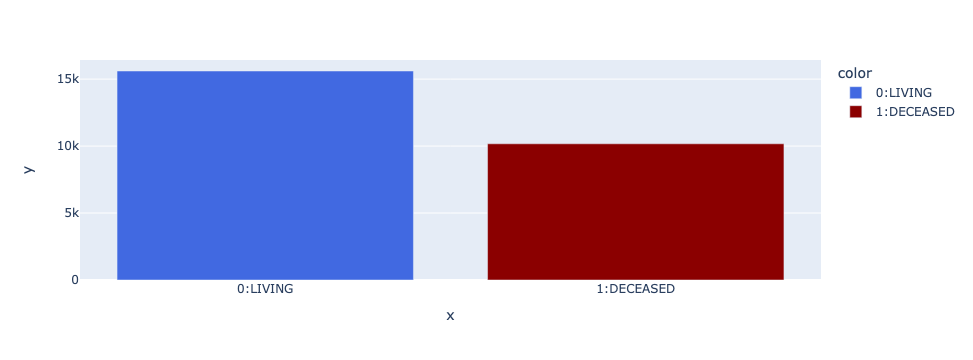

In [6]:
import plotly.express as px

status_count = df[event].value_counts()
px.bar(
    x=status_count.index,
    y=status_count.values,
    color=status_count.index,
    color_discrete_sequence=["royalblue", "darkred"],
)

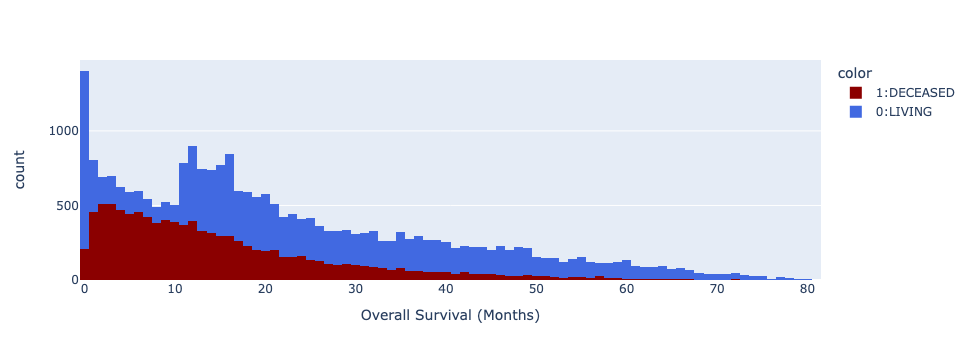

In [7]:
fig = px.histogram(
    df[duration],
    color=df[event],
    color_discrete_sequence=["darkred", "royalblue"]
)
fig.update_layout(xaxis_title=duration)

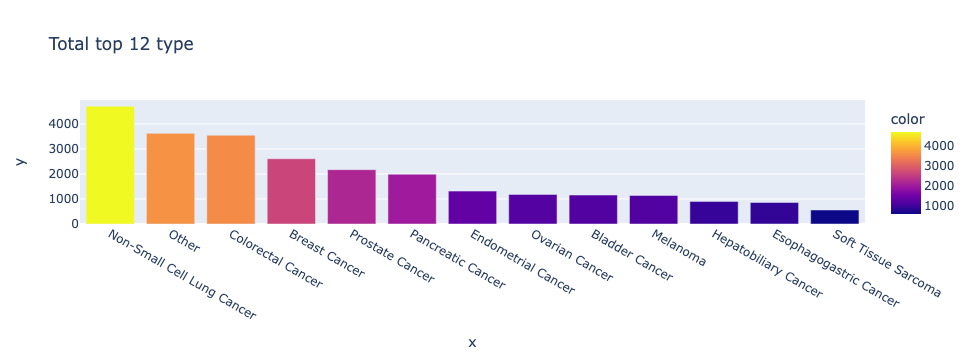

In [8]:
k = 12

topk_types = df["Cancer Type"].value_counts().head(k).index
df["Cancer Type"] = df["Cancer Type"].apply(lambda x: x if x in topk_types else "Other")

type_count = df["Cancer Type"].value_counts()
px.bar(
    x=type_count.index,
    y=type_count.values,
    color=type_count.values,
    title=f"Total top {k} type",
)

In [9]:
def plot_violin_duration_per_type(df):
    fig = go.Figure()
    is_event = df[event].unique()[0]
    cols = ["Cancer Type", duration]
    for name, data_line in df[cols].groupby("Cancer Type"):
        fig.add_trace(
            go.Violin(x=data_line[duration], name=name)
        )
    fig.update_traces(
        orientation='h',
        side='positive',
        width=2,
        points=False,
    )
    fig.update_layout(
        title=f"Duration for {is_event}",
        height=600,
        xaxis_title=duration,
        xaxis_showgrid=False,
        xaxis_zeroline=False,
    )
    fig.show()

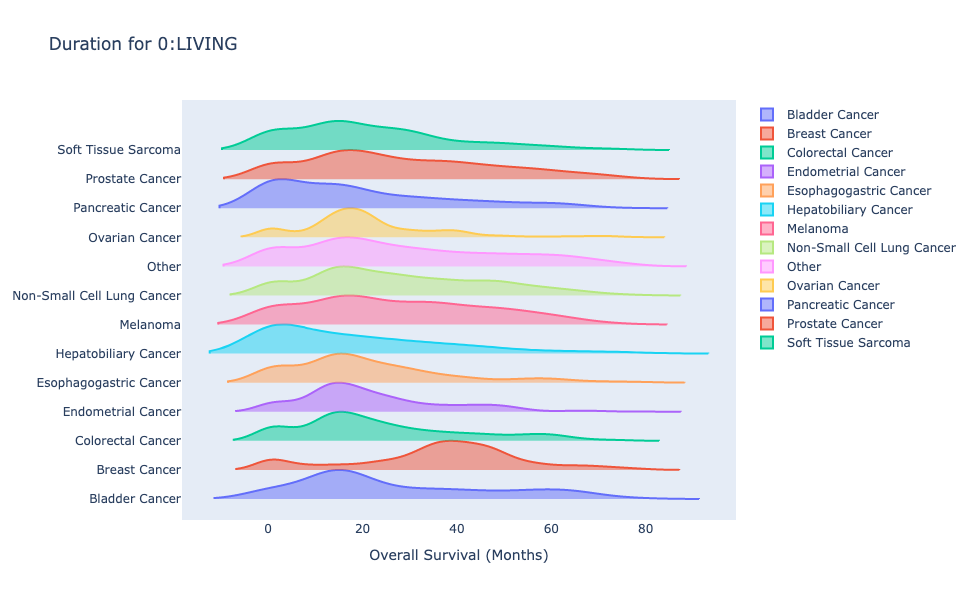

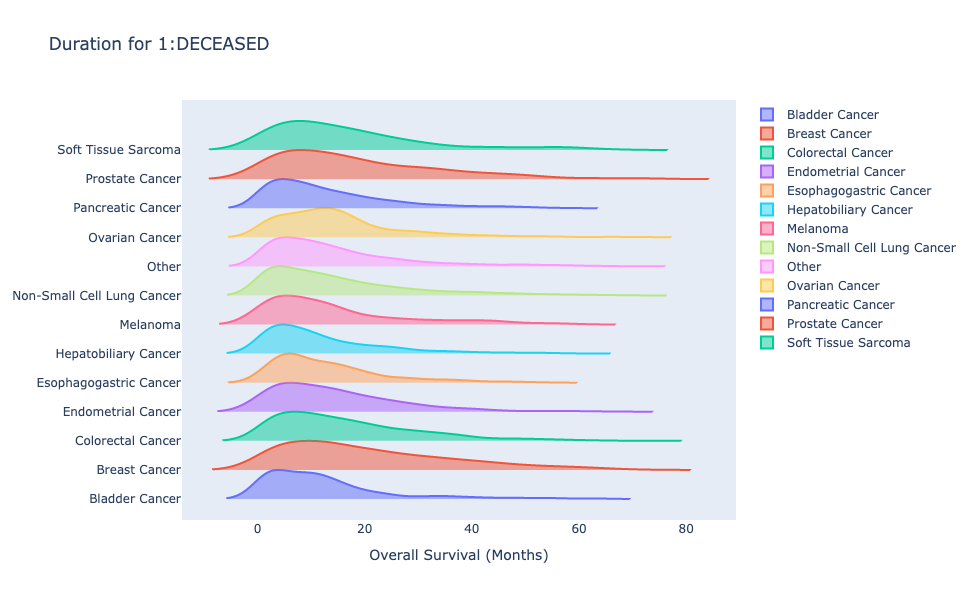

In [10]:
import plotly.graph_objects as go

df_surv = df.loc[df[event] == "0:LIVING"]
plot_violin_duration_per_type(df_surv)

df_event = df.loc[df[event] == "1:DECEASED"]
plot_violin_duration_per_type(df_event)

According to the article definition, the number of deceased people having a value for 'Age at Last Contact' should be 0.

In [11]:
df.loc[
    (df[event] == "1:DECEASED") & (df["Age at Last Contact"].notnull())
].shape

(146, 55)

In [12]:
df.loc[
    (df["Age at Death"].notnull()) & (df["Age at Last Contact"].notnull())
].shape

(0, 55)

In [13]:
df.loc[
    (df["Age at Death"].isna() & (df[event] == "1:DECEASED"))
].shape

(146, 55)

In [14]:
df.loc[
    (df["Age at Sequencing"] > df["Age at Surgical Procedure"])
].shape

(18901, 55)

In [15]:
df.loc[
    (df["Age at Sequencing"] < df["Age at Surgical Procedure"])
].shape

(0, 55)

In [16]:
df.shape

(25775, 55)

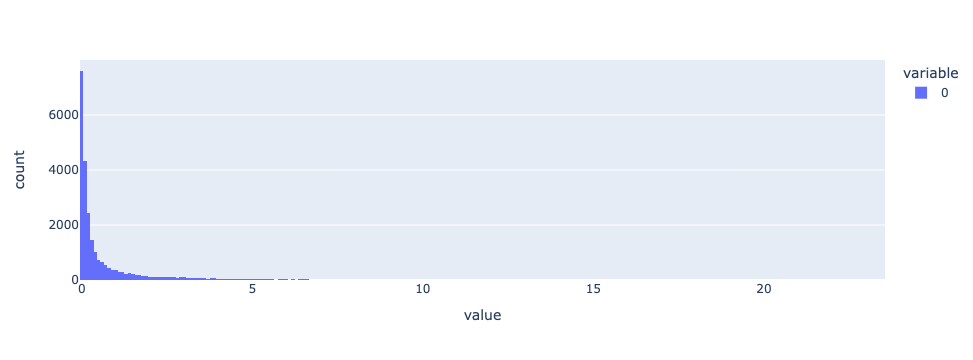

In [17]:
px.histogram(df["Age at Sequencing"] - df["Age at Surgical Procedure"])

Let's see the ratio of not NaN per age cols:

In [18]:
age_cols = df.columns[df.columns.str.lower().str.contains("age ")]
100 * df[age_cols].notnull().sum() / df.shape[0]

Age at Death                 38.886518
Age at First Mets Dx         76.190107
Age at Last Contact          60.702231
Age at Sequencing            98.999030
Age at Surgical Procedure    96.810863
dtype: float64

106 patients have no record of either last contact or death. Remaining patients have either a death or a last contact record, which defines our right-censoring.

In [19]:
df[duration].isna().sum()

116

In [20]:
def get_mean_surv(times, surv_proba):
    diff_times = np.diff(np.hstack([[0], times]))
    return (surv_proba * diff_times).sum()

def get_median_surv(times, surv_proba):
    dist_to_median = np.abs(surv_proba - .5)
    return times[np.argmin(dist_to_median)]

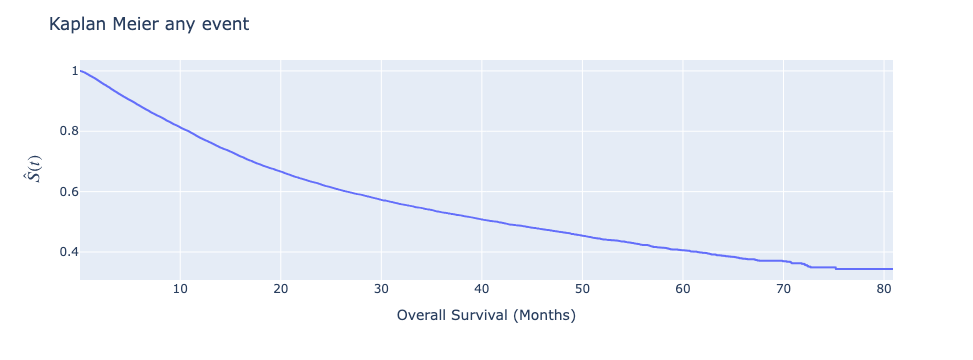

Mean survival time: 44.67
Median survival time: 41.53


In [21]:
from sksurv.nonparametric import kaplan_meier_estimator

df = (
    df.loc[df[duration] > 0]
    .reset_index(drop=True)
)

event_dict = {'1:DECEASED': True, '0:LIVING': False}
df[event] = df[event].map(event_dict)

km_x, km_y = kaplan_meier_estimator(
    df[event],
    df[duration],
)

fig = px.line(x=km_x, y=km_y, line_shape="hv");
fig.update_layout(
    title="Kaplan Meier any event",
    xaxis_title=duration,
    yaxis_title="$\hat{S}(t)$",
)
fig.show()

km_mean = get_mean_surv(km_x, km_y)
print(f"Mean survival time: {km_mean:.2f}")
km_median = get_median_surv(km_x, km_y)
print(f"Median survival time: {km_median:.2f}")

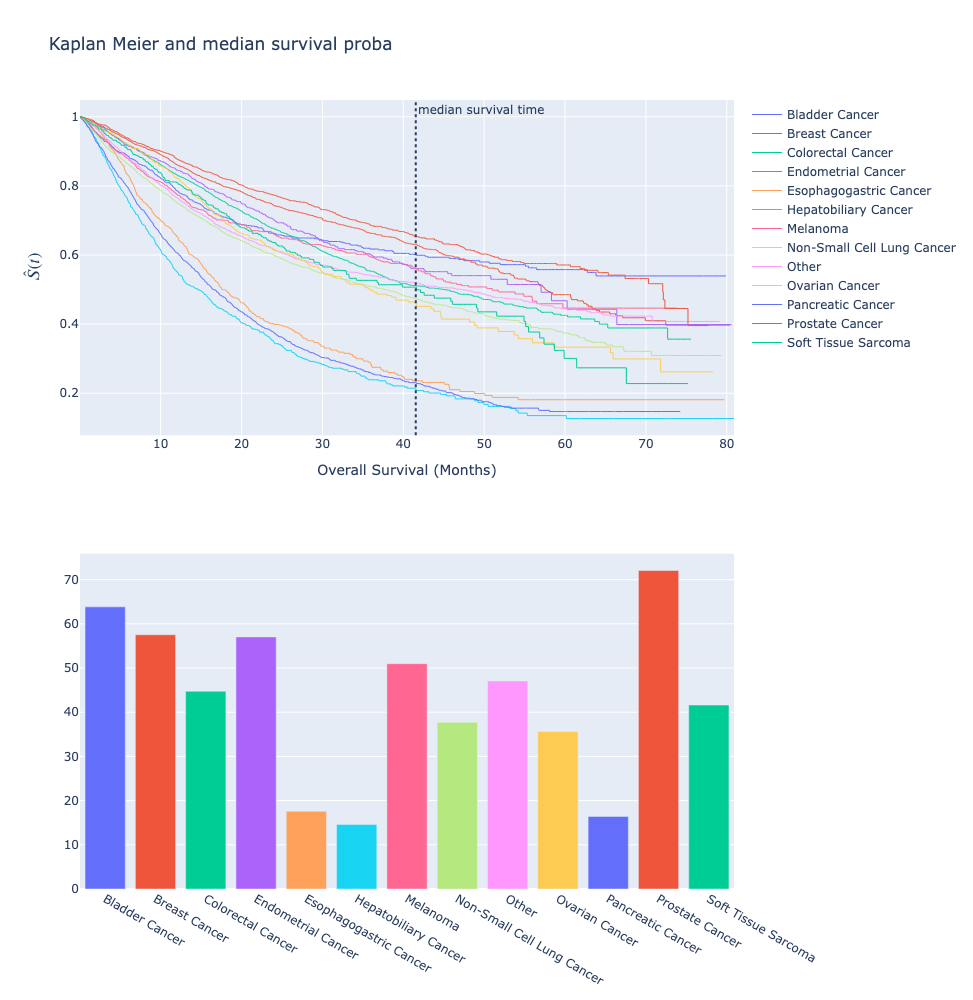

In [23]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)
for idx, (cancer_type, df_cancer) in enumerate(df.groupby("Cancer Type")):
    
    km_x, km_y = kaplan_meier_estimator(
        df_cancer[event],
        df_cancer[duration],
    )
    
    color = px.colors.qualitative.Plotly[idx % 10]
    
    # plot KM
    fig.add_trace(
        go.Scatter(
            x=km_x,
            y=km_y,
            line_width=1,
            line_shape="hv",
            name=cancer_type,
            line_color=color,
        ),
        row=1, col=1,
    )
    
    # plot Bar
    fig.add_trace(
        go.Bar(
            x=[cancer_type],
            y=[get_median_surv(km_x, km_y)],
            showlegend=False,
            marker_color=color,
        ),
        row=2, col=1,
    )

fig.add_vline(
    x=km_median, annotation_text="median survival time",
    line_dash="dot", row=1, col=1,
)
fig.update_layout(
    height=1000, width=1000,
    xaxis_title=duration,
    yaxis_title="$\hat{S}(t)$",
    title="Kaplan Meier and median survival proba"
)
fig.show()

## Feature engineering

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24561 entries, 0 to 24560
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       24561 non-null  object 
 1   Patient ID                     24561 non-null  object 
 2   Sample ID                      24561 non-null  object 
 3   Age at Death                   9954 non-null   float64
 4   Age at First Mets Dx           19035 non-null  float64
 5   Age at Last Contact            14607 non-null  float64
 6   Age at Sequencing              24414 non-null  float64
 7   Age at Surgical Procedure      23851 non-null  float64
 8   Cancer Type                    24561 non-null  object 
 9   Cancer Type Detailed           24561 non-null  object 
 10  Distant Mets: Adrenal Gland    24561 non-null  object 
 11  Distant Mets: Biliary tract    24561 non-null  object 
 12  Distant Mets: Bladder/UT       24561 non-null 

In [25]:
num_cols, categ_cols = [], []

We discuss below the inclusion and transformations of features.

- IDs

    We remove all IDs since they won't bring any predictive power.
    
- Age

    Although including `Age at Death` and `Age at Last Contact` would lead to a direct target leakage, `Age at Sequencing`  and `Age at Surgical Procedure` will bring leakage-proof context.

In [26]:
num_cols.append("Age at Sequencing")

- Cancer types and detail

    `Cancer type`, coupled to `Overall Survival Status` is not our prediction label but a feature. We don't used Cancer type detail since it extends the description of the cancer type.

In [27]:
categ_cols.append("Cancer Type")

- `Dist` cols are boolean under `str` format, we convert those to `int`.

In [28]:
df["Distant Mets: Adrenal Gland"].head()

0     No
1     No
2     No
3    Yes
4     No
Name: Distant Mets: Adrenal Gland, dtype: object

In [29]:
categ_cols += df.columns[df.columns.str.contains("Dist")].tolist()

- `FGA` and `Fraction Genome Altered` are the same variable, although the latter is more precise than the former:

In [30]:
corr = df[["FGA", "Fraction Genome Altered"]].corr().values[0][1]
print(f"Pearson corr: {corr:.3f}")
df[["FGA", "Fraction Genome Altered"]].head()

Pearson corr: 0.9999504431606169


FGA  Fraction Genome Altered
0  0.278                   0.2782
1  0.350                   0.3503
2  0.388                   0.3878
3  0.102                   0.1020
4  0.420                   0.4196

In [31]:
num_cols.append("Fraction Genome Altered")

- Other relevant categorical columns include:
    
    `Metastatic Site`, `Primary Tumor Site`, `Race Category`, `Sex`, `MSI Type`

In [32]:
categ_cols += [
    "Metastatic patient",
    "Metastatic Site",
    "Primary Tumor Site",
    "Gene Panel",
    "Race Category",
    "Sex",
    "MSI Type",
]

- Other relevant numerical columns include:
    
    `Met Count`, `Mutation Count`, `MSI Score`, `Sample coverage`, `TMB (nonsynonymous)`, `Tumor Purity`

In [33]:
num_cols += [
    "Met Count",
    "Mutation Count",
    "MSI Score",
    "Sample coverage",
    "TMB (nonsynonymous)",
    "Tumor Purity",
]

Next, we define our target.

In [133]:
event_dict = {"0:LIVING": False, "1:DECEASED": True}
y_event = df[event].map(event_dict).values
y_duration = df[duration].values

y = np.empty(
    dtype=[("event", bool), ("duration", np.float64)],
    shape=df.shape[0],
)
y["event"] = y_event
y["duration"] = y_duration

In [137]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

categ_cols_no_metastatic = list(set(categ_cols) - {"Metastatic Site"})

imputer = make_column_transformer(
    (SimpleImputer(strategy="constant", fill_value="None", add_indicator=False), ["Metastatic Site"]),
    (SimpleImputer(strategy="most_frequent"), categ_cols_no_metastatic),
    (SimpleImputer(strategy="mean"), num_cols),
    remainder="passthrough",
)
preprocessor = make_column_transformer(
    (OrdinalEncoder(), categ_cols),
    (StandardScaler(), num_cols),
    remainder="drop",
    verbose_feature_names_out=True,
)

X = imputer.fit_transform(df)

cols = [col.split("__")[1] for col in imputer.get_feature_names_out()]
df_no_nan = pd.DataFrame(X, columns=cols)
X = preprocessor.fit_transform(df_no_nan)

print(X.shape, y.shape)
print(pd.DataFrame(X).isna().sum().sum())
print(Counter(y["event"]))

(24561, 37) (24561,)
0
Counter({False: 14466, True: 10095})


## YASGBT

In [138]:
from models.yasgbt import YASGBTClassifier
from model_selection.cross_validation import run_cv

yasgbt = YASGBTClassifier(n_iter=20)
yasgbt.name = "MSK_yasgbt"
run_cv(X, y, yasgbt)

train set: 19648, val set: 4913


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

train set: 19649, val set: 4912


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

train set: 19649, val set: 4912


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

train set: 19649, val set: 4912


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

train set: 19649, val set: 4912


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

--------
ibs: 0.1705 ± 0.0033
c_index: 0.6632 ± 0.0017
training_duration: 2.0349 ± 0.1895
prediction_duration: 0.3724 ± 0.0809


## CoxPH

In [139]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from model_selection.wrappers import SkurvWrapper

cox_ph = SkurvWrapper(CoxPHSurvivalAnalysis())
cox_ph.name = "MSK_CoxPH"
run_cv(X, y, cox_ph)

train set: 19648, val set: 4913
train set: 19649, val set: 4912
train set: 19649, val set: 4912
train set: 19649, val set: 4912
train set: 19649, val set: 4912
--------
ibs: 0.1867 ± 0.0069
c_index: 0.6971 ± 0.0056
training_duration: 1.5544 ± 0.0670
prediction_duration: 0.4711 ± 0.0173


## XGBSE Debiased BCE

In [140]:
from xgbse import XGBSEDebiasedBCE
from model_selection.wrappers import XGBSEWrapper

PARAMS_TREE_COX = {
    'objective': 'survival:cox',
    'eval_metric': 'cox-nloglik',
    'tree_method': 'hist',
    'max_depth': 10,
    'booster': 'dart',
    'subsample': 1.0,
    'min_child_weight': 50,
    'colsample_bynode': 1.0,
    'verbosity': 1,
    'nthread': 4,
}
xgbse_bce_cox = XGBSEDebiasedBCE(PARAMS_TREE_COX, n_jobs=4)

fit_kwargs=dict(
    num_boost_round=30,  # instead of 1000
    verbose_eval=5,  # print eval every 5 rounds
)

xgbse_bce_cox = XGBSEWrapper(xgbse_bce_cox, fit_kwargs=fit_kwargs)
xgbse_bce_cox.name = "MSK_XGBSE_Debiased_BCE"

run_cv(X, y, xgbse_bce_cox)

train set: 19648, val set: 4913
train set: 19649, val set: 4912
train set: 19649, val set: 4912
train set: 19649, val set: 4912
train set: 19649, val set: 4912
--------
ibs: 0.2083 ± 0.0037
c_index: 0.6967 ± 0.0085
training_duration: 2.3611 ± 0.9074
prediction_duration: 0.2217 ± 0.0579


## Results

In [141]:
from model_selection.cross_validation import get_all_results

df_tables, df_lines = get_all_results(match_filter="MSK")

In [142]:
df_tables

Method             C_td              IBS training_duration  \
0  yasgbt  0.6632 ± 0.0017  0.1705 ± 0.0033           2.0349s   
1   CoxPH  0.6971 ± 0.0056  0.1867 ± 0.0069           1.5544s   
2     BCE  0.6967 ± 0.0085  0.2083 ± 0.0037           2.3611s   

  prediction_duration  n_sample_train  n_sample_val  
0             0.3724s           19649          4912  
1             0.4711s           19649          4912  
2             0.2217s           19649          4912

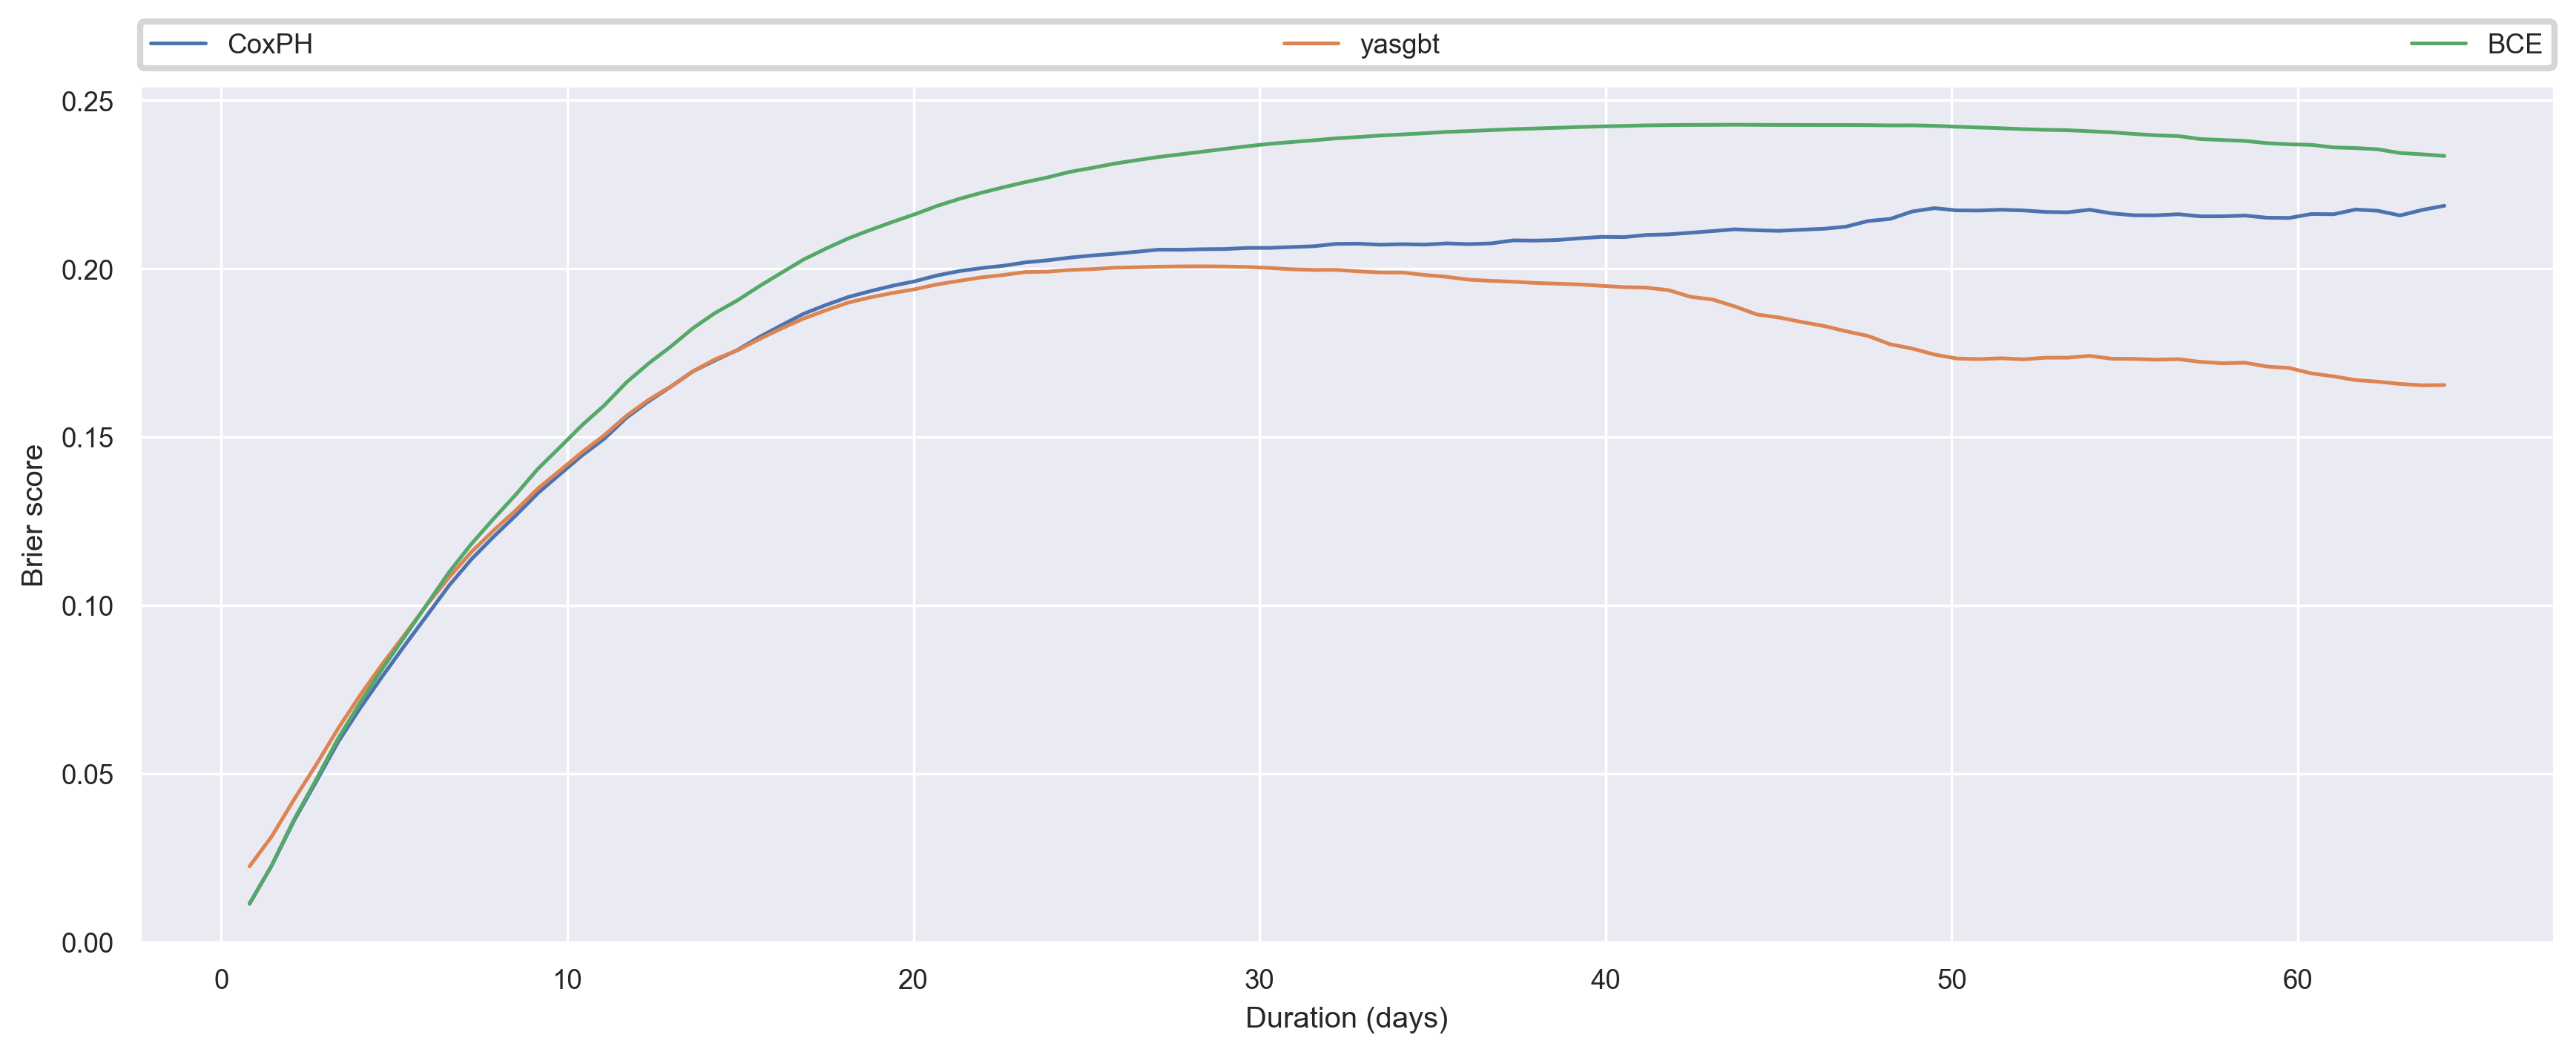

In [143]:
from plot.brier_score import plot_brier_scores

plot_brier_scores(df_lines)

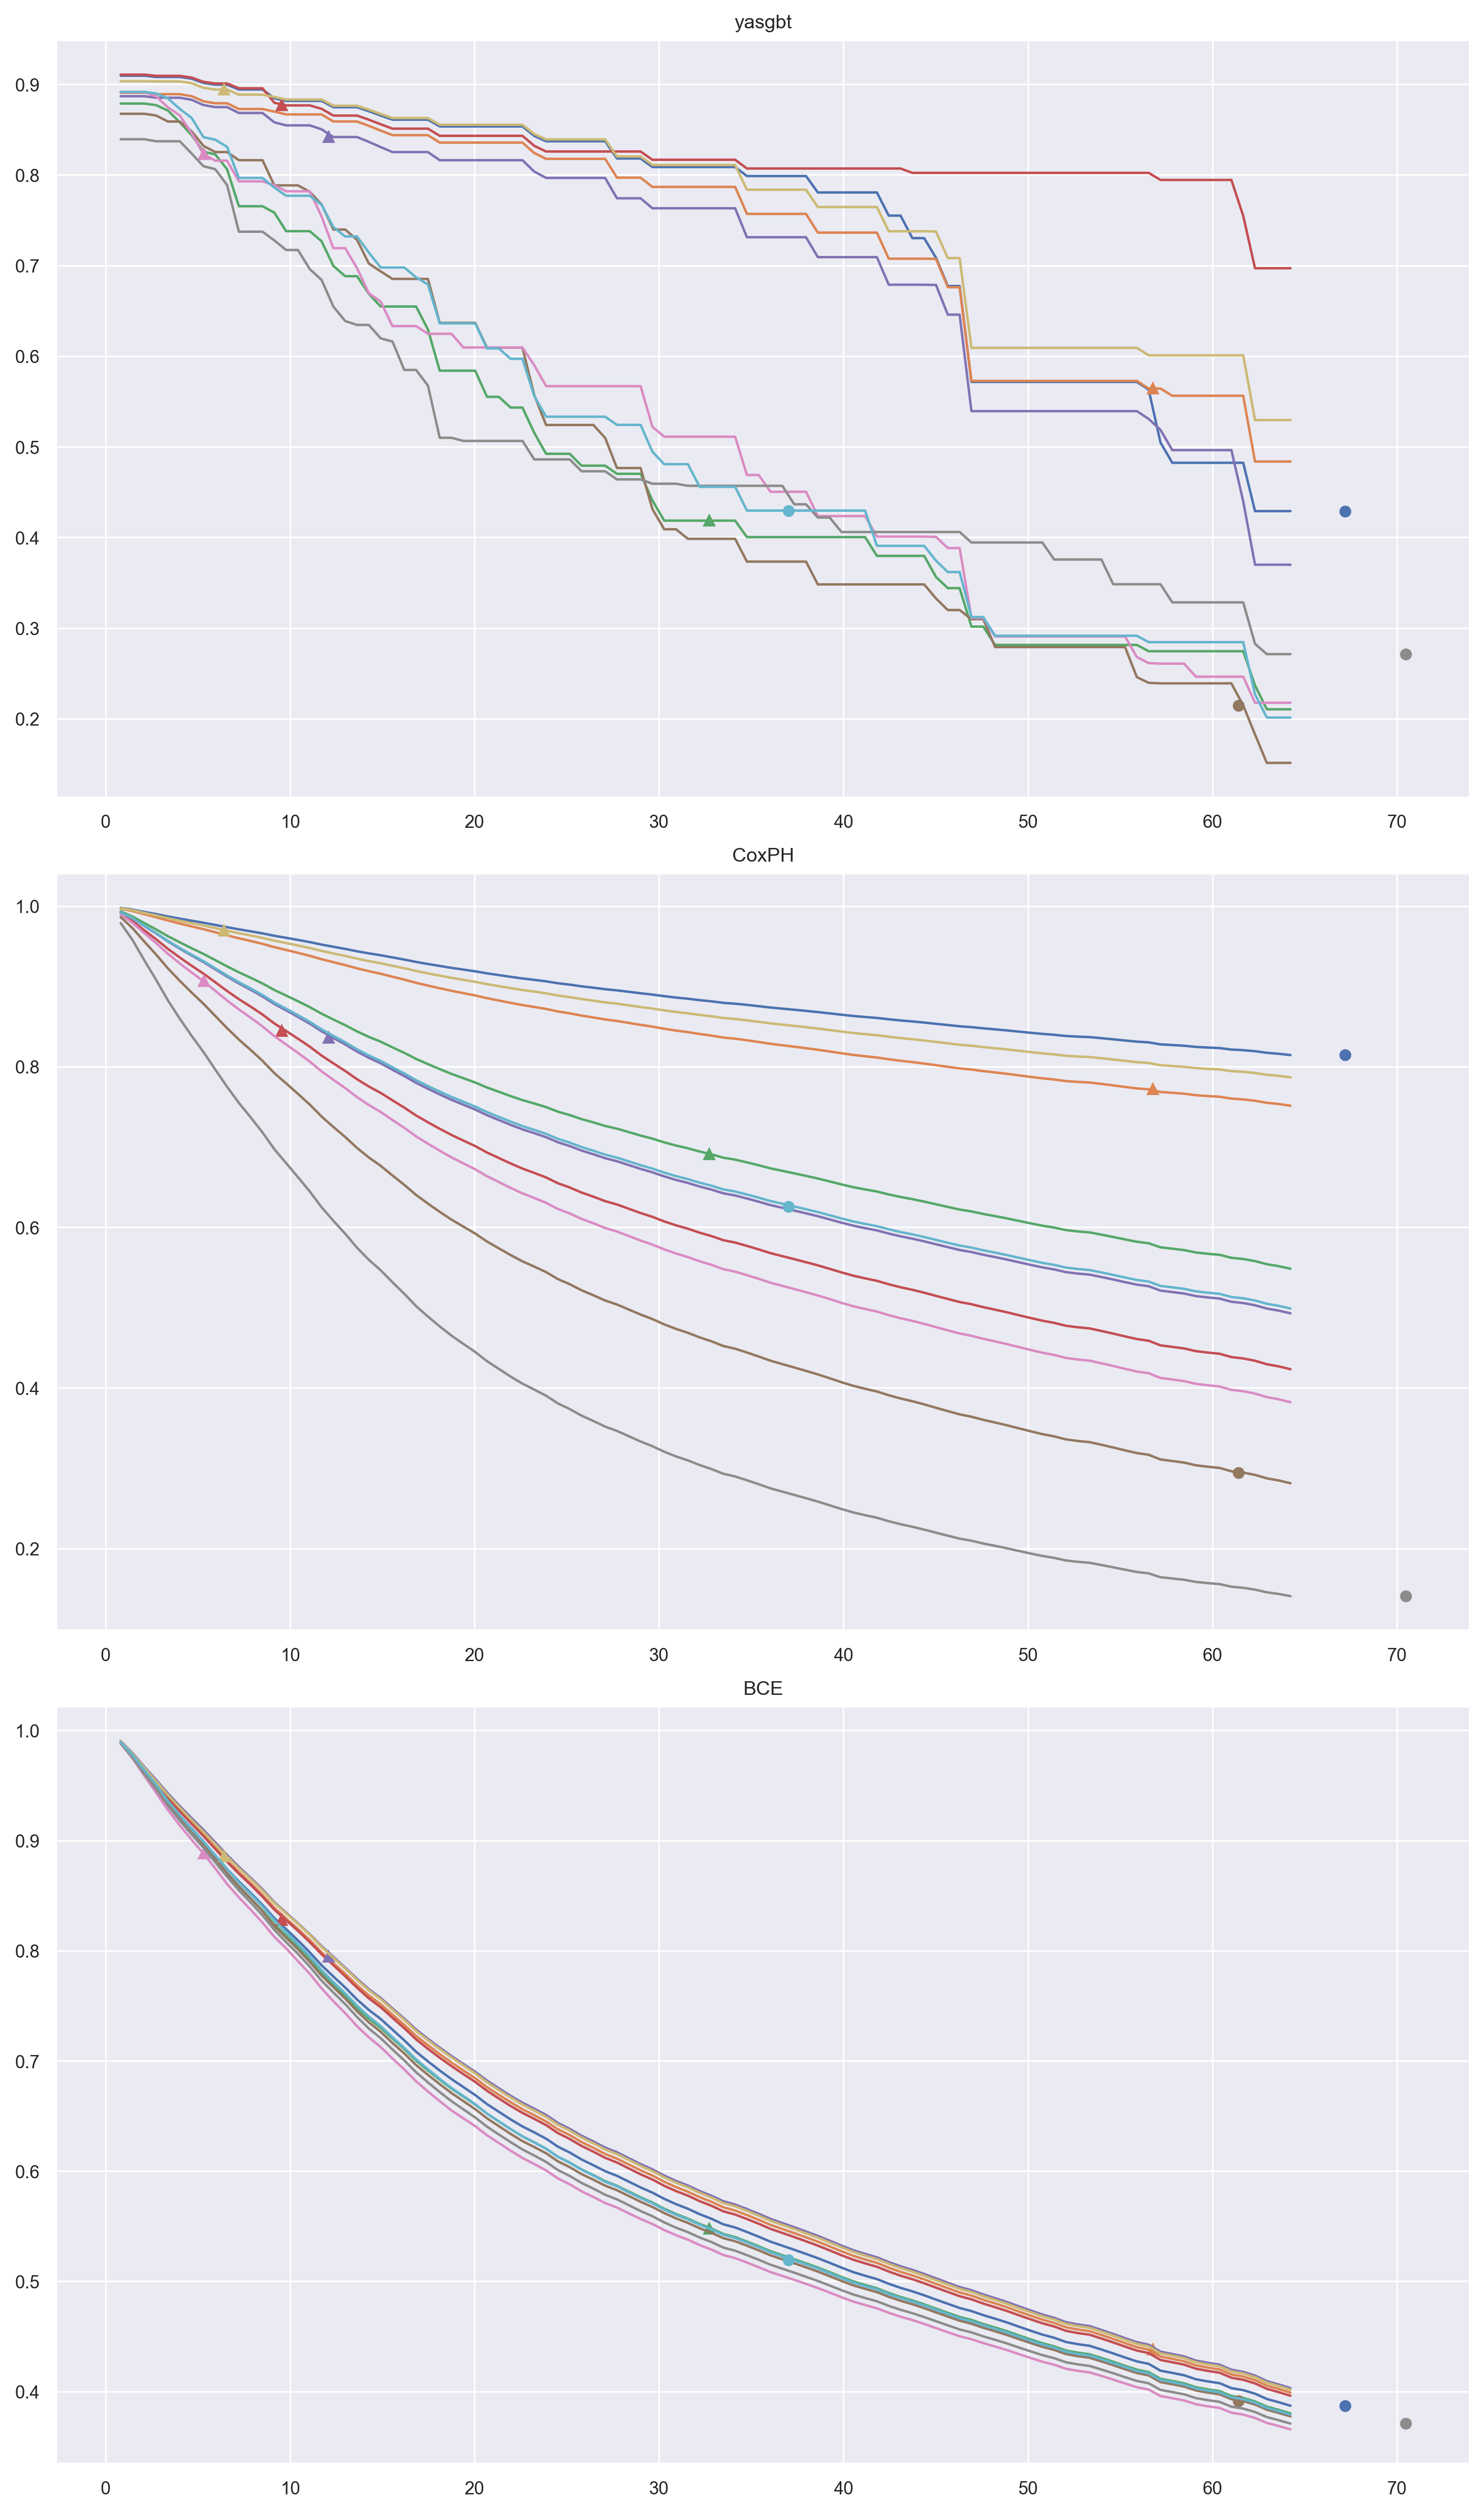

In [145]:
from plot.individuals import plot_individuals_survival_curve

# "^" is an event, "o" is a survivor 
plot_individuals_survival_curve(df_tables, df_lines, y, n_indiv=10)